In [27]:
import numpy as np
import pandas as pd
import nltk

In [28]:
df = pd.read_csv("fake-news/train.csv")

In [29]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [30]:
from nltk.stem import WordNetLemmatizer 

In [31]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [35]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [36]:
df.reset_index(drop=True,inplace=True)

In [37]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [38]:
X = df.drop(columns=['label'])

In [39]:
y = df['label']

In [40]:
X['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [42]:
from nltk.stem import WordNetLemmatizer 

In [44]:
from nltk.corpus import stopwords

In [45]:
import re

In [53]:
lem = WordNetLemmatizer()

In [54]:
corpus = []
for i in range(len(df)):
    sentence = re.sub('^a-zA-Z',' ',df['title'][i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [lem.lemmatize(word) for word in sentence if word not in stopwords.words('english')]
    corpus.append(' '.join(sentence))
        
    

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vec = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [58]:
X = vec.fit_transform(corpus).toarray()

In [62]:
vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.2,random_state=34)

In [65]:
vec_count = pd.DataFrame(Xtrain,columns = vec.get_feature_names())

In [72]:
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 5000

In [73]:
vec_count.head()

000  000 email  000 job  00pm  00pm water  00pm water cooler   01   10  \
0  0.0        0.0      0.0   0.0         0.0                0.0  0.0  0.0   
1  0.0        0.0      0.0   0.0         0.0                0.0  0.0  0.0   
2  0.0        0.0      0.0   0.0         0.0                0.0  0.0  0.0   
3  0.0        0.0      0.0   0.0         0.0                0.0  0.0  0.0   
4  0.0        0.0      0.0   0.0         0.0                0.0  0.0  0.0   

   10 000  10 year  100  100 000  100 day  100 million  1000  100percentfedup  \
0     0.0      0.0  0.0      0.0      0.0          0.0   0.0              0.0   
1     0.0      0.0  0.0      0.0      0.0          0.0   0.0              0.0   
2     0.0      0.0  0.0      0.0      0.0          0.0   0.0              0.0   
3     0.0      0.0  0.0      0.0      0.0          0.0   0.0              0.0   
4     0.0      0.0  0.0      0.0      0.0          0.0   0.0              0.0   

   100percentfedup com   11  11 16  11 2016   12   13   14   15  150   16  \
0                  0.0  0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                  0.0  0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                  0.0  0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                  0.0  0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                  0.0  0.0    0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   16 year   17   18   19   1b  1st   20  20 year  200  2006  2008  2014  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   0.0   0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   0.0   0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   0.0   0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   0.0   0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   0.0   0.0   0.0   

   2015  2016  2016 breitbart  2016 election  2016 new  2016 new york  \
0   0.0   0.0             0.0            0.0       0.0            0.0   
1   0.0   0.0             0.0            0.0       0.0            0.0   
2   0.0   0.0             0.0            0.0       0.0            0.0   
3   0.0   0.0             0.0            0.0       0.0            0.0   
4   0.0   0.0             0.0            0.0       0.0            0.0   

   2016 presidential  2016 video  2017  2018  2020  20k  20th   21   22   23  \
0                0.0         0.0   0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0   
1                0.0         0.0   0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0   
2                0.0         0.0   0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0   
3                0.0         0.0   0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0   
4                0.0         0.0   0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0   

    24   25   26   27   28   29  2nd   30  300   31   33   35   36   40  400  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    42   45   47   50  50 000  500   60   65  650   70  700   72   75   76  \
0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    78   80  800   82   83   84   85   87   90   91   94  94 new  94 new york  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0          0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0          0.0   
2  0.0  0.0  0.0  0.

In [74]:
import seaborn as sns

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
mulb = MultinomialNB()

In [77]:
mulb.fit(Xtrain,ytrain)

MultinomialNB()

In [80]:
pre = mulb.predict(Xtest)

In [81]:
from sklearn.metrics import confusion_matrix

In [114]:
cm = confusion_matrix(ytest,pre)

In [125]:
from matplotlib import pyplot as plt

In [180]:
import matplotlib as mpl

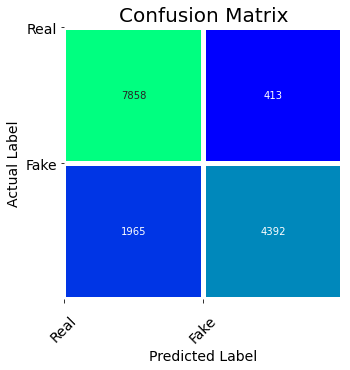

In [184]:
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix",fontsize=20)
sns.heatmap(cm,annot=True,cbar=False,cmap='winter',linewidths=4,linecolor='white',fmt='g')
plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("Actual Label",fontsize=14)
# mpl.rcParams['xtick.major.pad'] = 10
# mpl.rcParams['xtick.minor.pad'] = 10
plt.xticks([0,1],['Real','Fake'],rotation=45,fontsize=14)
plt.yticks([0,1],['Real','Fake'],rotation=360,fontsize=14);

In [124]:
from sklearn.metrics import accuracy_score
print('Accuracy socre is %0.3f'%accuracy_score(ytest,pre))

Accuracy socre is 0.837


# HyperParameter tuining 

In [185]:
classifier = MultinomialNB(alpha=0.1)

In [187]:
import numpy as np

In [191]:
score = 0
for i in np.arange(0,1,0.1):
    clf = MultinomialNB(alpha=i)
    clf.fit(Xtrain,ytrain)
    pre = clf.predict(Xtest)
    acc_score = accuracy_score(ytest,pre)
    if acc_score > score:
        classifier = clf
    print(f"Accuracy score for alpha {i} is {acc_score}")

C:\Users\suman\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy score for alpha 0.0 is 0.7904019688269073
Accuracy score for alpha 0.1 is 0.8398960896910036
Accuracy score for alpha 0.2 is 0.8445447087776866
Accuracy score for alpha 0.30000000000000004 is 0.8465955701394585
Accuracy score for alpha 0.4 is 0.8463904840032814
Accuracy score for alpha 0.5 is 0.8460486737763194
Accuracy score for alpha 0.6000000000000001 is 0.8460486737763194
Accuracy score for alpha 0.7000000000000001 is 0.8439978124145474
Accuracy score for alpha 0.8 is 0.8421520371889527
Accuracy score for alpha 0.9 is 0.8395542794640416


In [192]:
classifier.coef_[0]

C:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-7.56897326, -8.88843123, -9.14096715, ..., -8.78452114,
       -8.54519337, -7.9708959 ])

In [213]:
vec.get_feature_names()[:20]

['000',
 '000 email',
 '000 job',
 '00pm',
 '00pm water',
 '00pm water cooler',
 '01',
 '10',
 '10 000',
 '10 year',
 '100',
 '100 000',
 '100 day',
 '100 million',
 '1000',
 '100percentfedup',
 '100percentfedup com',
 '11',
 '11 16',
 '11 2016']

In [216]:
tuple(zip(classifier.coef_[0],vec.get_feature_names()))[:20]

((-7.568973263796029, '000'),
 (-8.888431229432282, '000 email'),
 (-9.140967149646784, '000 job'),
 (-8.370114613322347, '00pm'),
 (-8.546439546981931, '00pm water'),
 (-8.546439546981931, '00pm water cooler'),
 (-8.761913970310536, '01'),
 (-7.251449433303824, '10'),
 (-8.84535712826141, '10 000'),
 (-9.140967149646784, '10 year'),
 (-7.713435871207363, '100'),
 (-8.753186378482825, '100 000'),
 (-8.792138170008458, '100 day'),
 (-9.140967149646784, '100 million'),
 (-8.753239705201953, '1000'),
 (-9.140967149646784, '100percentfedup'),
 (-9.140967149646784, '100percentfedup com'),
 (-7.808423489835561, '11'),
 (-9.140967149646784, '11 16'),
 (-8.481030983085912, '11 2016'))

In [217]:
sorted(zip(classifier.coef_[0],vec.get_feature_names()))[:20]

[(-9.140967149646784, '000 job'),
 (-9.140967149646784, '10 year'),
 (-9.140967149646784, '100 million'),
 (-9.140967149646784, '100percentfedup'),
 (-9.140967149646784, '100percentfedup com'),
 (-9.140967149646784, '11 16'),
 (-9.140967149646784, '15'),
 (-9.140967149646784, '150'),
 (-9.140967149646784, '16 year'),
 (-9.140967149646784, '1b'),
 (-9.140967149646784, '1st'),
 (-9.140967149646784, '20 year'),
 (-9.140967149646784, '2014'),
 (-9.140967149646784, '2016 breitbart'),
 (-9.140967149646784, '2016 new york'),
 (-9.140967149646784, '2020'),
 (-9.140967149646784, '20th'),
 (-9.140967149646784, '25'),
 (-9.140967149646784, '26'),
 (-9.140967149646784, '33')]